<a href="https://colab.research.google.com/github/NoufAlshenaifi/Rasid-at-StanceEval2024/blob/main/MARBERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


In [ ]:
pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 5.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from tqdm.notebook import tqdm_notebook
from sklearn.model_selection import train_test_split
import torch
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW,BertTokenizerFast,Trainer, TrainingArguments
from torch.utils.data import DataLoader, TensorDataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW
from torch import nn
from torch.utils.data import DataLoader
import re
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import accuracy_score
from nltk.stem.isri import ISRIStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import string
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
import io
import os
import torch
from tqdm.notebook import tqdm
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import classification_report, accuracy_score
from transformers import (set_seed,
                          TrainingArguments,
                          Trainer,
                          GPT2Config,
                          GPT2Tokenizer,
                          AdamW,
                          get_linear_schedule_with_warmup,
                          GPT2ForSequenceClassification)
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import random


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data = pd.read_csv("V2_Mawqif_AllTargets_Train.csv")

In [ ]:
train, val = train_test_split(data, test_size=0.1, random_state=42)

In [ ]:
test = val

In [ ]:
train.head()

,ID,text,target,stance
557,665,#نسويات_نشكر_ولي_العهد اكيد نشكره على تمكين ال...,Women empowerment,Favor
650,776,🔻من الخاص 📩 فيه تطعيم كورونا بالاحساء ٢٤ ساع...,Covid Vaccine,Favor
1226,1451,والله ماهم احرص ولا يستاهلون حتى نومن عيالنا ...,Covid Vaccine,Against
2851,3348,عشان يخلون العالم يطعمون وياخذون من وراهم فلو...,Covid Vaccine,Against
2812,3305,MENTION انا مع التطعيمات بجميع أنواع والحمدالل...,Covid Vaccine,Favor


In [ ]:
train.drop(columns=['ID'],inplace=True)
val.drop(columns=['ID'],inplace=True)

In [ ]:
train = train.astype(str)
test = test.astype(str)
val = val.astype(str)

In [ ]:
class preprocessing:

  def normalize(sentence):
    '''
    Argument:
        string of words
    return:
        string of words but standardize the words
    '''
    sentence = re.sub("[إأآا]", "ا", sentence)
    sentence = re.sub("ى", "ي", sentence)
    sentence = re.sub("ؤ", "ء", sentence)
    sentence = re.sub("ئ", "ء", sentence)
    sentence = re.sub("ة", "ه", sentence)
    sentence = re.sub("گ", "ك", sentence)
    return sentence

  def cleaning(sentence):
    '''
      Argument:
          string of words
      return:
          string of words but after removing punctuations
    '''
    text = re.sub(r'[a-zA-Z0-9_#&*$,]',"",sentence)
    text = re.sub(r'[^\w\s]',"",text)

    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('arabic'))
    tokens = [word for word in tokens if word not in stop_words]

    # Perform stemming
    #stemmer = ISRIStemmer()
    #tokens = [stemmer.stem(word) for word in tokens]

    # Join the tokens back into a string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

  def preprocess(sentence):
    '''
    Argument:
        string of words
    return:
        string of words after cleaning
    '''
    clean = preprocessing.normalize(sentence)
    clean = preprocessing.cleaning(clean)
    return clean

In [ ]:
train['text'] = train['text'].apply(preprocessing.preprocess)
test['text'] = test['text'].apply(preprocessing.preprocess)
val['text'] = val['text'].apply(preprocessing.preprocess)

In [ ]:
train.head()

In [ ]:
train['stance'].value_counts()

stance
Favor      1942
Against     913
Nothing     296
Name: count, dtype: int64

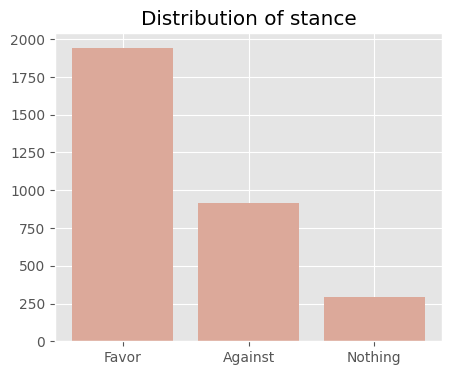

In [ ]:
fig = plt.figure(figsize =(5, 4))
plt.bar(train['stance'].value_counts().index, train['stance'].value_counts(),color ='#DCA99A');
plt.title("Distribution of stance");
plt.savefig("diall.png")

In [ ]:
temp = train.groupby('stance').count()['text'].reset_index().sort_values(by='text',ascending=False)[:5]

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score
from imblearn.metrics import geometric_mean_score

In [ ]:
# Define metrics
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average='macro')
  acc = accuracy_score(labels, preds)
  precision = precision_score(labels, preds, average='macro')
  recall = recall_score(labels, preds, average='macro')
  g_mean = geometric_mean_score(labels, preds)


  return {'Accuracy Score': acc, 'F1 Score': f1, 'G_Mean': g_mean, 'Precision Score': precision, 'Recall Score': recall}


In [ ]:
print(train['stance'].dtype)
print(train['stance'].unique())

object
['Favor' 'Against' 'Nothing']


In [ ]:
label_mapping = {'Favor': 0, 'Against': 1, 'Nothing':2}
train['stance'] = train['stance'].map(label_mapping)
val['stance'] = val['stance'].map(label_mapping)
test['stance'] = val['stance'].map(label_mapping)

In [ ]:
# Convert labels to tensor
train_labels = train['stance']
val_labels = val['stance']
test_labels = test['stance']

In [ ]:
#train_labels = torch.tensor(train['stance'].values)
#test_labels = torch.tensor(val['stance'].values)

In [ ]:
train.head()

,text,target,stance
557,#نسويات_نشكر_ولي_العهد اكيد نشكره على تمكين ال...,Women empowerment,0
650,🔻من الخاص 📩 فيه تطعيم كورونا بالاحساء ٢٤ ساع...,Covid Vaccine,0
1226,والله ماهم احرص ولا يستاهلون حتى نومن عيالنا ...,Covid Vaccine,1
2851,عشان يخلون العالم يطعمون وياخذون من وراهم فلو...,Covid Vaccine,1
2812,MENTION انا مع التطعيمات بجميع أنواع والحمدالل...,Covid Vaccine,0


In [ ]:
class DialectsDataset(Dataset):
  def __init__(self, encodings, labels):
      self.encodings = encodings
      self.labels = labels.to_list()

  def __getitem__(self, idx):
      item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
      item['labels'] = torch.tensor(int(self.labels[idx]))
      return item

  def __len__(self):
      return len(self.labels)

In [ ]:
#train_labels = train['stance']
#val_labels = val['stance']
#test_labels = val['stance']

In [ ]:
#MODEL 1
model1 = AutoModelForSequenceClassification.from_pretrained('UBC-NLP/MARBERTv2', num_labels=5)
tokenizer1 = BertTokenizerFast.from_pretrained('UBC-NLP/MARBERTv2')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at UBC-NLP/MARBERTv2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#model1.to(device)

In [ ]:
#Encode text & prepare dataloader
train_encodings1 = tokenizer1(train['text'].to_list(), truncation=True, padding=True, max_length=200)
val_encodings1 = tokenizer1(val['text'].to_list(), truncation=True, padding=True, max_length=200)
test_encodings1 = tokenizer1(test['text'].to_list(), truncation=True, padding=True, max_length=200)

In [ ]:
ds_train1 = DialectsDataset(train_encodings1, train_labels)
ds_val1 =  DialectsDataset(val_encodings1, val_labels)
ds_test1 =  DialectsDataset(test_encodings1, test_labels)

In [ ]:
training_args1 = TrainingArguments(
    output_dir='results',
    num_train_epochs=5,
    learning_rate=0.00001,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=32,
    evaluation_strategy = "epoch",
    save_strategy = 'epoch',
    )

trainer1 = Trainer(
    model=model1,
    args=training_args1,
    train_dataset=ds_train1,
    eval_dataset=ds_val1,
    compute_metrics=compute_metrics,

)

In [ ]:
trainer1.train()

Epoch,Training Loss,Validation Loss


ValueError: cannot convert float NaN to integer

In [ ]:
trainer1.evaluate(ds_test1)

In [ ]:
#ds_val1
trainer1.evaluate(ds_val1)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



{'eval_loss': 0.6100925803184509,
 'eval_Accuracy Score': 0.7749287749287749,
 'eval_F1 Score': 0.5367607382703047,
 'eval_G_Mean': 0.0,
 'eval_Precision Score': 0.5049382716049383,
 'eval_Recall Score': 0.5752127532062806,
 'eval_runtime': 65.2097,
 'eval_samples_per_second': 5.383,
 'eval_steps_per_second': 0.169,
 'epoch': 5.0}

In [ ]:
# Load blind test data
blind_data = pd.read_csv('Mawqif_AllTargets_Blind Test.csv')

In [ ]:
# Tokenize blind test data using the same settings as during training
tokenizer1 = BertTokenizerFast.from_pretrained('UBC-NLP/MARBERTv2')
blind_encodings = tokenizer1(blind_data['text'].tolist(), truncation=True, padding=True, max_length=60)

In [ ]:
# Define the dataset for blind test data, no labels included
class BlindTestDataset(Dataset):
    """ Dataset for blind test data, no labels included """
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}

    def __len__(self):
        return len(self.encodings['input_ids'])


In [ ]:
# Create dataset for blind test
blind_dataset = BlindTestDataset(blind_encodings)

In [ ]:
# Predict using the trained model and trainer
predictions = trainer1.predict(blind_dataset)

In [ ]:
# Extract the predicted labels (convert logits to labels)
predicted_labels = predictions.predictions.argmax(-1)

In [ ]:
# Define the reverse label mapping based on the mapping used during training
label_mapping = {'Favor': 0, 'Against': 1, 'Nothing': 2}
reverse_label_mapping = {value: key for key, value in label_mapping.items()}


In [ ]:
# Convert numeric labels back to string labels using the reverse mapping
predicted_stance_labels = [reverse_label_mapping[label] for label in predicted_labels]


In [ ]:
# Attach predicted labels to the blind test data
blind_data['predicted_stance'] = predicted_stance_labels


In [ ]:
# Display the first few rows to confirm predictions are attached and correct
print(blind_data[['text', 'predicted_stance']].head())


                                                text predicted_stance
0  الوضع صار بالسعوديه يفشل لا عاد فيه شركات صاحي...          Against
1     الفساد الإداري انهك البلاد ومازلنا نعتمد عل...            Favor
2  -البي بي سي ١٠ دول اوروبية توقف تطعيم اوكسفورد...          Against
3  منصة مدرستي بتسرع عملية التحول للتعليم الالكتر...            Favor
4                       انا مع تمكين المرأة اصلا URL            Favor


In [ ]:
# Save the results to a new CSV file for further use or analysis
blind_data.to_csv('(Submission#3)Mawqif_AllTargets_Blind_Test_Predictions.csv', index=False)